# House price prediction

## 1. Introduction

### 1.1 Problem statment

The real estate market lacks transparency and accuracy in house price estimation, making informed decisions difficult. Current methods rely on outdated data and manual evaluations, failing to address the market's dynamic nature. A Machine Learning model can bridge this gap by leveraging property features, location metrics, and historical data to deliver accurate price predictions for better decision-making.

### 1.2 Objective

To design and implement a machine learning-based system that predicts house prices in Delhi, India with high accuracy.

## 2. Dataset
The dataset, sourced from Kaggle ([Kaggle link](https://www.kaggle.com/datasets/saipavansaketh/pune-house-data?select=Delhi+house+data.csv)), provides housing data with features relevant to price estimation.
##### Features Used:
1. **Area**: Total built-up area of the house (in sq. ft.).
2. **Number of bedrooms**: Total number of bedrooms in the house.
3. **Parking Space**: Number of available parking spaces.
##### Target:
**House price**, measured in INR (Indian Rupees).

## 3. Package and imports

In [117]:
# for array computations and loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# function to load data
from function_module import plot_data

## 4. Model evaluation and selection
### 4.1 initial evaluation of dataset
This includes the examination of the data, including verification of the input and target data sizes, as well as primary visualization of the data.

In [118]:
# Load the dataset from the csv file
data = pd.read_csv('./Data/Delhi house data.csv', delimiter=',', skiprows=1, na_values=[''])

# Split the inputs and outputs into separate arrays using .iloc for integer-based indexing
x = data.iloc[:, 0:3].values
y = data.iloc[:, 3].values

# Convert 1-D arrays into 2-D

y = np.expand_dims(y, axis=1)

# Display the first few rows of x and y to verify
print(x[:5])
print(y[:5])

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

[[7.5e+02 2.0e+00 1.0e+00]
 [9.5e+02 2.0e+00 1.0e+00]
 [6.0e+02 2.0e+00 1.0e+00]
 [6.5e+02 2.0e+00 1.0e+00]
 [1.3e+03 4.0e+00 1.0e+00]]
[[ 5000000]
 [15500000]
 [ 4200000]
 [ 6200000]
 [15500000]]
the shape of the inputs x is: (1258, 3)
the shape of the targets y is: (1258, 1)


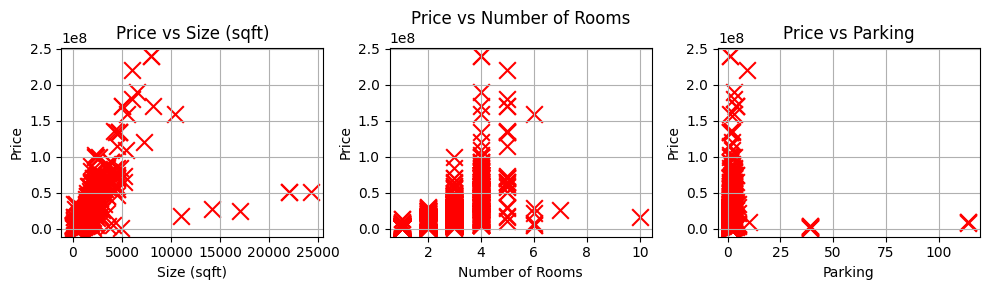

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Loop through each feature in x and plot
for i in range(x.shape[1]):
    axs[i].scatter(x[:, i], y, marker='x', c='r')
    axs[i].set_title(f"Price vs {feature_names[i]}")
    axs[i].set_xlabel(feature_names[i])
    axs[i].set_ylabel("Price")
    axs[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4.2 Split the dataset into training, cross validation, and test sets
* ***training set*** - utilized to train the model.
* ***cross validation set (also called validation, development)*** - used to assess various models.
* ***test set*** - provides an unbiased estimate of the model's performance on unseen data.

split the entire dataset to 60% training, 20% cross validation, and 20% test.